## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.8.0


### Loading Model

In [ ]:
model = tf.keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/aicrop/trained_models.keras'
)



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 124, 124, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │      55,297,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │          42,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,563,098 (646.83 MB)

 Trainable params: 56,521,032 (215.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,042,066 (431.22 MB)

### Visualizaing Single Image of Test set

In [ ]:
!pip install opencv-python

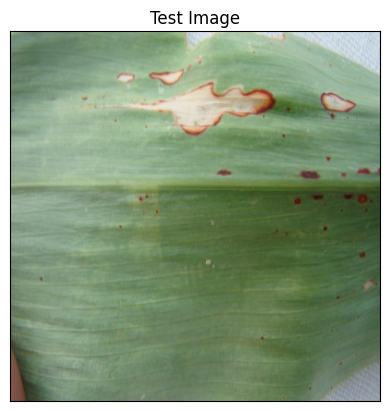

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/Colab Notebooks/aicrop/Dataset/Blast/1 (11).JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


(array([[8.9570513e-08, 2.3483180e-05, 2.7496702e-05, 9.9825758e-01,
         3.1980145e-04, 2.2067371e-07, 2.2227110e-07, 1.6195839e-08,
         6.0263032e-04, 6.6803758e-09, 1.9993873e-04, 8.2732239e-09,
         3.0529856e-07, 2.8496117e-05, 8.6000732e-08, 1.4679620e-06,
         7.3764011e-07, 3.0646453e-07, 4.9043656e-04, 8.7662411e-06,
         1.1640798e-08, 2.2270617e-08, 2.7260572e-08, 3.1104153e-06,
         2.6031477e-08, 3.4678633e-05, 1.3106369e-07, 5.4225705e-08]],
       dtype=float32),
 (1, 28))

In [ ]:
result_index = np.argmax(prediction)
result_index

np.int64(3)

In [ ]:
class_name = ['Aggregate sheath',
 'Bacterial_leaf_blight',
 'Bacterial_leaf_streak',
 'Blast',
 'Brown spot',
 'Eye spot',
 'False smut',
 'Kernel smut',
 'Leaf smut',
 'Leaf smut (1)',
 'Narrow brown leaf spot',
 'Narrow brown leaf spot (1)',
 'Sheath rot',
 'Sheath spot',
 'Tungro1',
 'crown sheath rot',
 'flag leaf sheath',
 'foot_rot',
 'grassy stunt virus',
 'leaf scald',
 'leaf scald (1)',
 'pecky_rice_kernel_spotting',
 'pecky_rice_kernel_spotting (1)',
 'powdery mildew',
 'ragged stunt virus',
 'sheath blight',
 'sheath_brown_rot',
 'yellow mottle1']

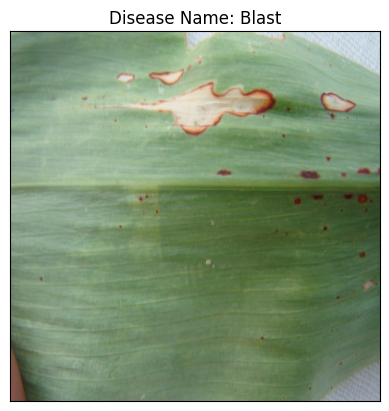

In [ ]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Blast'